# Project: Investigate The Movie Database (TMDb) 

--by Lu Tang

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Data can be download from[here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv).
> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> **The project aims to explore the following questions:**
> - Question 1: What are the trend for movie industry? Are movie industry making more money over years
> - Question 2: Are newer movies more popular?
> - Question 3: What are the top 5 most common movie generes that associated with high revenue?
> - Question 4. Is it possible to make extremely high profit movies with low budget?
> - Question 5: What are the top 10 rated movies? and how is their profitibility?

In [1]:
# import library that will be used in this project 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# loading data
tmdb=pd.read_csv('tmdb-movies.csv')
# show number of rows and columns
print(tmdb.shape)
# to avoid truncated output 
pd.options.display.max_columns = 150 
# show first 2 rows
tmdb.head(2)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


> **Initial observation**: 
>- Our focus will be analyzing movie properties associated with high revenue, some columns are irrelavant for our analysis, e.g `id`,`imdb_id`, `homepage`, `tagline`, `keywords, overview, production_companies, release_date` (since we already have `release_year`).
>- we can also remove `budget` and `revenue`, since we have `budget_adj` and `revenue_adj` to analyze.

In [3]:
# Drop extraneous columns  
drop_col=['id','imdb_id','homepage','tagline','keywords','overview','production_companies','release_date','budget','revenue']
tmdb = tmdb.drop(drop_col, axis=1)
# check the result
tmdb.head(1)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# check data type and missing values
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [5]:
# check statistical information 
tmdb.describe(include='all')

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866,10790,10822,10866.000000,10843,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10571,10719,5067,NaN,2039,NaN,NaN,NaN,NaN,NaN
top,NaN,Hamlet,Louis C.K.,Woody Allen,NaN,Drama,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,6,45,NaN,712,NaN,NaN,NaN,NaN,NaN
mean,0.646441,NaN,NaN,NaN,102.070863,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,NaN,NaN,NaN,31.381405,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,NaN,NaN,NaN,0.000000,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,NaN,NaN,NaN,90.000000,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,NaN,NaN,NaN,99.000000,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,NaN,NaN,NaN,111.000000,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


> **Insights**:
>- Some columns contain NaN values, but the amount is not significant; we don't need to drop all the nulls at the beginning.
>- Data type are all correct.
>- The minimum `runtime` is 0, which is impossible, and some movies have extremely long runtime, we will investigate the outlier data
>- `budget_adj` and `revenue_adj` have minimum and median value as 0 too, which is odd, and the difference from 75% to maximum is huge, we need to investigate in the later anaysis process
>-  `popularity ` , `vote_count` has very uneven distribution, with some extreme high value data.  

### Data Cleaning 

This dataseat is generally clean, column names are also clear and with preferred snakecase. For some string columns that contains '|', we will clean and analyze in the later part specific to the question we want to answer.

**1. Remove duplicated data**

In [6]:
# check how many rows are duplicated
sum(tmdb.duplicated())

1

In [7]:
# Drop duplicated rows
tmdb.drop_duplicates(inplace=True)

# douch check the results
sum(tmdb.duplicated())

0

**2. Cleaning abnormal data for runtime**

In [8]:
# Find out how many rows are 0 for runtime
sum(tmdb["runtime"]==0)

31

In [9]:
# Since it is impossible to have runtime as 0, we will remove these.
tmdb=tmdb[tmdb["runtime"]>0]

#double check the result
sum(tmdb["runtime"]==0)

0

**3. Cleaning abnormal data for budget**

In [10]:
sum(tmdb["budget_adj"]==0)

5668

In [11]:
# It is impossible to make a movie without any budget, we will remove these data
tmdb=tmdb[tmdb["budget_adj"]>0]

# Double check the result
sum(tmdb["budget_adj"]==0)

0

**4. Cleaning abnormal data for revenue**

In [12]:
sum(tmdb["revenue_adj"]==0)

1312

In [13]:
# Since we will analyze moview revenue, movies with zero revenue may contain incorrect information, we will remove these data
tmdb=tmdb[tmdb["revenue_adj"]>0]

# Double check the result
sum(tmdb["revenue_adj"]==0)

0

In [14]:
# Double check the cleaning result
print(tmdb.shape)
tmdb.head(1)

(3854, 11)


,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

## 1. Find pattern and visualize relationship

**1_1. Explore relations with `revenue_adj`**

Text(0.5, 1.0, 'Correlation heatmap for whole movie data')

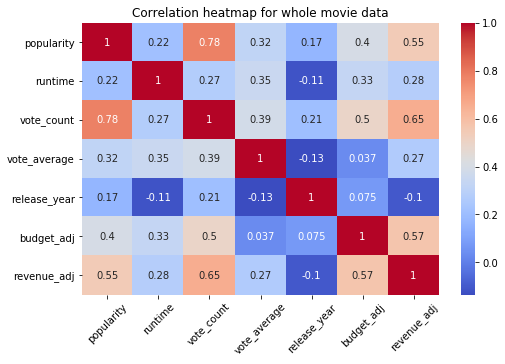

In [15]:
# plot a heatmap to see correlation with `revenue_adj` for each columns
plt.figure(figsize=(8,5))
sns.heatmap(tmdb.corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation heatmap for whole movie data')

**Analysis:**
>-  `revenue_adj` is positive-correlated with `popularity`, `vote_count` and `budget_adj`, which makes sense, the more popular, the more vote_count and and more revenues. And high budget movies are expected with high revenue too.
>- `popularity` and `vote_count` are strongly correlated eith each other.
>- `runtime`, `vote_average` and `release_year` do not have strong relation with any other columns. In fact `release_year` is slighly negative-correlated with `revenue_adj`. 

**1_2. Plotting charts to find out the distribution for the variables that do not have strong correlation with movie revenue, i.e. `runtime, vote_average, release_year`.**

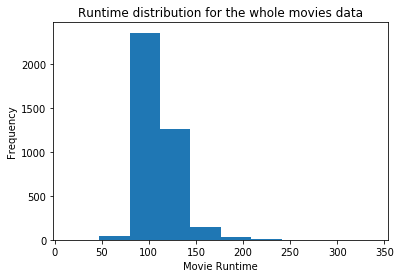

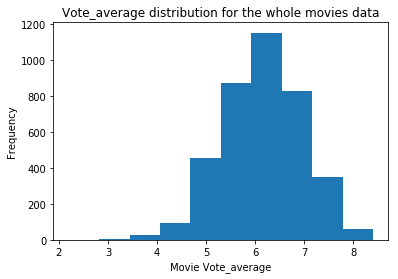

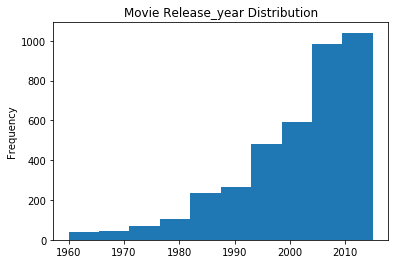

In [16]:
# plotting distribution for 'runtime'
tmdb['runtime'].plot.hist(title='Runtime distribution for the whole movies data')
plt.xlabel('Movie Runtime')
plt.show()

# plotting distribution for 'vote_average'
tmdb['vote_average'].plot.hist(title='Vote_average distribution for the whole movies data')
plt.xlabel('Movie Vote_average')
plt.show()

# plotting distribution for 'release_year'
tmdb['release_year'].plot.hist(title=('Movie Release_year Distribution'))
plt.show()

**Conclusion:**
>- Most movies have median length from about 100 minutes to 180 minutes.
>- `vote_average` has a distribution that looks like normal with average around 6.
>- There are more movies produced over time.

**1_3. Plotting scatter chart to explore detailed relationship between `popularity` and `vote_count`, and find out outliers.** 

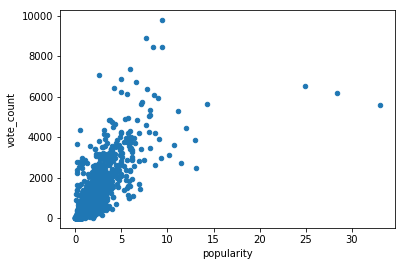

In [17]:
# plotting relation for 'popularity' and 'vote_count'
tmdb.plot.scatter(x='popularity',y='vote_count')

**Analysis:**
>- From the scatter chart, we can see `popularity` and `vote_count` have strong positive correlation, same result as the heatmap; however, we can also notice there are three movies rated extremely high popularity, but vote count is not extremely high.
>- From the heatmap, both `popularity` and `vote_count` are positively correlated with moview revenue. If we run regression model to predict movie revenues, we need to choose of one of them as an independent variable, but this is beyond the scope of this project.

**1_4. Plotting scatter charts to furthur explore the relation with `revenue_adj` for the varibles of `popularity`, `vote_count` and `budget_adj`.**

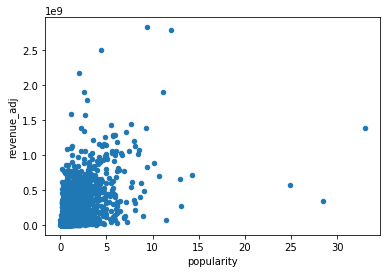

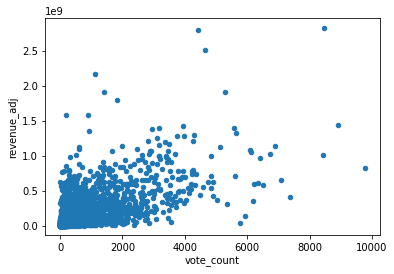

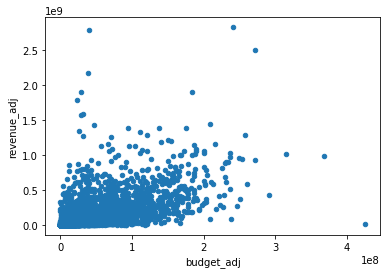

In [18]:
tmdb.plot.scatter(x='popularity', y='revenue_adj')
tmdb.plot.scatter(x='vote_count',y='revenue_adj')
tmdb.plot.scatter(x='budget_adj',y='revenue_adj')

**Analysis:**
>- In general, the three variabels(`popularity`, `vote_count` and `budget_adj`) are all positively correlated with `revenue_adj`, but the correlation is not very strong, which is the same conclusion from the heatmap;
>- There are many outlier data, some movies with extremely high popularity and high vote_count do not have extremely high revenue. These movies maybe controversial, and popularity and vote_count alone are not good indicator for movie success.
>- Also, some extremely high budget movies do not have very high revenue, which means they maybe losing money.

## 2. Explore Answers for research questions 

### Question 1. What are the profitibility trend for movie industry? 

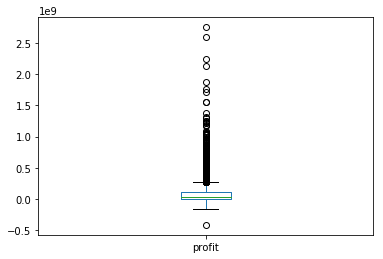

In [19]:
# create a column for profit
tmdb['profit']=tmdb['revenue_adj']-tmdb['budget_adj']
# plot a box chart for the profit column
tmdb['profit'].plot.box()

**Analysis:**
>- Some movies are losing money; others, however have huge profit.

In [20]:
# Create a dataframe that group by year and calculate the mean value
year_mean=tmdb.groupby('release_year').mean()
year_mean.head(2)

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
release_year,,,,,,,
1960,1.324513,130.0,372.6,7.40,3.068179e+07,1.902299e+08,1.595481e+08
1961,0.787718,132.5,191.4,6.62,2.818516e+07,2.463622e+08,2.181770e+08


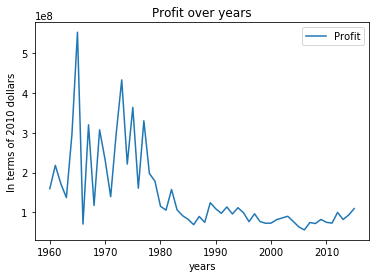

In [21]:
# plotting line chart for the average profit groupby each year
plt.plot(year_mean.index, year_mean['profit'],label='Profit')
plt.xlabel('years')
plt.ylabel('In terms of 2010 dollars')
plt.title('Profit over years')
plt.legend()

**Analysis:**
>- Surprisingly, the average profit per year started to decrease since about 1980; there is less profit to making a movie compared with three decades ago.
>- In the earlier years from 1960 to 1980, film industry have higher profit but with very high fluctuation too. Even though the profit is lower since 1989, but the profit trend is more stable. Probably in the earlier years, film industry is relatively new, and high risk is associated with high profit.

### Question 2. Are newer movies more popular?

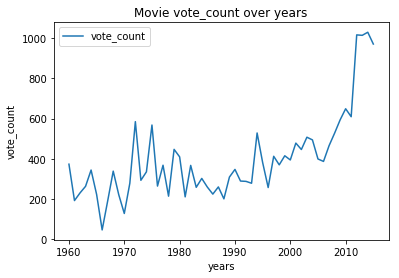

In [22]:
# Since popularuty variable has some outlier data, we use vote_count to count for popularity.
plt.plot(year_mean.index, year_mean['vote_count'], label='vote_count')
plt.xlabel('years')
plt.ylabel('vote_count')
plt.title('Movie vote_count over years')
plt.legend()

**Analysis:**
>- Yes. There is clear trend that the newer movies received more vote count and are more popular. 

### Question 3. What are the top 5 most common movie generes that associated with high revenue?

**1. Find out the movies with very high revenues**

In [23]:
# check the distribution for 'revenue_adj'
tmdb.revenue_adj.describe([.8,.9]).iloc[3:]

min    2.370705e+00
50%    6.173068e+07
80%    2.033811e+08
90%    3.538761e+08
max    2.827124e+09
Name: revenue_adj, dtype: float64

In [24]:
# Create an ordinal data column to categorize movies with different levels of revenues
bin_edge=[0, 2.872138e+07, 1.496016e+08, 2.880722e+08, 3e+09]
bin_names=['very_low','low','high','very_high']
tmdb['revenue_level']=pd.cut(tmdb.revenue_adj,bin_edge,labels=bin_names)
tmdb['revenue_level'].value_counts()

low          1550
very_low     1271
very_high     517
high          516
Name: revenue_level, dtype: int64

>- Half of the movies have very_low or even negative revenue
>- There are **517 movies with very high_revenue**, let's focus on these movies.

In [25]:
# Create a dataframe that only contains movies with very high revenues
very_high_revenue = tmdb[tmdb['revenue_level']=='very_high']
# View top 5 very_high revenue movies
very_high_revenue.head()

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_level
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,very_high
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,very_high
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,very_high
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,very_high
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08,very_high


**2. Find out among the very_high profit movies, what kinds of generes are the most common ones.** 

In [26]:
# separate the generes with '|' and make it a new table
generes = very_high_revenue['genres'].str.split('|', expand=True)
# view the first 5 rows of the new table
generes.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
5,Western,Drama,Adventure,Thriller,None


In [27]:
# Count the frequency for each genere in column 0 in the generes table, sorted as index.
col_0 = generes.loc[:,0].value_counts().sort_index()
# Convert the pandas Series to a data frame 
df_0 = pd.DataFrame(data=col_0, index=col_0.index)
# display the new dataframe
df_0

,0
Action,121
Adventure,116
Animation,44
Comedy,63
Crime,12
Drama,61
Family,12
Fantasy,26
History,3
Horror,9


In [28]:
# do the same for other columns:
col_1=generes.loc[:,1].value_counts().sort_index()
df_1=pd.DataFrame(data=col_1, index=col_1.index)

col_2=generes.loc[:,2].value_counts().sort_index()
df_2=pd.DataFrame(data=col_2, index=col_2.index)

col_3=generes.loc[:,3].value_counts().sort_index()
df_3=pd.DataFrame(data=col_3, index=col_3.index)

col_4=generes.loc[:,4].value_counts().sort_index()
df_4=pd.DataFrame(data=col_4, index=col_4.index)

In [29]:
# join the other 4 dataframe together
generes_join=df_0.join(df_1).join(df_2).join(df_3).join(df_4)
generes_join

,0,1,2,3,4
Action,121,79,33,3.0,4.0
Adventure,116,74,36,14.0,1.0
Animation,44,23,9,3.0,2.0
Comedy,63,44,37,13.0,5.0
Crime,12,16,19,11.0,2.0
Drama,61,52,32,5.0,1.0
Family,12,36,40,28.0,9.0
Fantasy,26,42,23,15.0,10.0
History,3,5,4,1.0,NaN
Horror,9,5,3,1.0,1.0


In [30]:
# fill null value with 0
generes_join.fillna(0)

,0,1,2,3,4
Action,121,79,33,3.0,4.0
Adventure,116,74,36,14.0,1.0
Animation,44,23,9,3.0,2.0
Comedy,63,44,37,13.0,5.0
Crime,12,16,19,11.0,2.0
Drama,61,52,32,5.0,1.0
Family,12,36,40,28.0,9.0
Fantasy,26,42,23,15.0,10.0
History,3,5,4,1.0,0.0
Horror,9,5,3,1.0,1.0


In [31]:
# calculate the sum of each genere's frequency and create a new column for the sum
generes_join['sum_generes'] = generes_join.sum(axis=1)
# sort value based on frequency sum and show top 5
generes_join.sort_values('sum_generes', ascending=False).head()

,0,1,2,3,4,sum_generes
Adventure,116,74,36,14.0,1.0,241.0
Action,121,79,33,3.0,4.0,240.0
Comedy,63,44,37,13.0,5.0,162.0
Drama,61,52,32,5.0,1.0,151.0
Thriller,9,38,66,28.0,7.0,148.0


**Analysis**
>- We can see among these very_high_revenue movies, the generes with **'Action', 'Adventure', 'Comedy','Drama', 'Thriller'** are top five generes.

### Question 4. Is it possible to make high profit movies with low budget?

In [32]:
# find out the median value of budget for the whole data
tmdb.budget_adj.median()

30016111.9054567

In [33]:
# create a table for low_budget movies
low_budget=tmdb[tmdb['budget_adj']<30016111.9054567]
# check how many rows are in this table
print(f'Number of low budget movies {low_budget.shape[0]}')
# view the distribution of 'revenue_level' in low_budget movie table
low_budget['revenue_level'].value_counts()

Number of low budget movies 1927


very_low     1020
low           746
high          100
very_high      61
Name: revenue_level, dtype: int64

In [34]:
# Percentage of very_high revenue movies with low_budget
61/1927

0.0316554229372081

**Analysis:**
>- There are only 3% of the movies that are made with low budget but yeilded very high revenue; we can conclude that most low budget movies does not yeild high revenue, and from the heatmap earlier, we can see the budget and revenue are positively correlated, higher budget movies generally yield higher revenue.

### Question 5. What are the top 10 rated movies? and how is their profitibility?

Since some movies have more vote_count, we can not directly compare a movie rated 10 with only 3 counts to the movie rated 7 with 100 counts. We will use IMDB'a definition to calculated **weighted average for movie rating score.**

In [35]:
# m is the minimum votes required to be listed in the chart;
m= tmdb['vote_count'].quantile(0.9)
print(f'The minimum votes required to be listed in the chart is: {m}')

The minimum votes required to be listed in the chart is: 1371.7000000000003


In [36]:
# C is the mean vote across the whole report
C=tmdb['vote_count'].mean()
print(f'The mean vote across the whole report is {C}')

The mean vote across the whole report is 527.7202906071614


In [37]:
# Create a table for top 10% highest rated movies
top_10_percent_movies = tmdb.copy().loc[tmdb['vote_count'] >= m]
print(f'Column and row number for the table of top 10% highest rated movies: {top_10_percent_movies.shape}')

Column and row number for the table of top 10% highest rated movies: (386, 13)


In [38]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

# Define a new feature 'score' and calculate its value with `weighted_rating()`
top_10_percent_movies['score'] = top_10_percent_movies.apply(weighted_rating, axis=1)

In [39]:
# show the top 10 rated movies
top_10_percent_movies.sort_values('score',ascending=False).head(10)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_level,score
2912,1.499784,Cloverfield,Lizzy Caplan|Jessica Lucas|Odette Annable|Mich...,Matt Reeves,85,Action|Thriller|Science Fiction,1373,6.4,2008,2.531967e+07,1.729475e+08,1.476279e+08,high,266.936686
2643,2.449323,The Mummy Returns,Brendan Fraser|Rachel Weisz|John Hannah|Arnold...,Stephen Sommers,130,Action|Adventure|Drama|Fantasy|Horror,1372,5.8,2001,1.206858e+08,5.332507e+08,4.125649e+08,very_high,266.731612
6980,2.175284,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,Steven Soderbergh,125,Thriller|Crime,1376,6.4,2004,1.269890e+08,4.187685e+08,2.917795e+08,very_high,266.652226
7884,2.484654,Ghostbusters,Bill Murray|Dan Aykroyd|Sigourney Weaver|Harol...,Ivan Reitman,107,Fantasy|Action|Comedy|Science Fiction|Family,1383,7.2,1984,6.297126e+07,6.196634e+08,5.566921e+08,very_high,266.392537
21,5.337064,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,Antoine Fuqua,123,Action|Drama,1386,7.3,2015,2.759999e+07,8.437300e+07,5.677302e+07,low,266.160831
658,3.813740,Exodus: Gods and Kings,Christian Bale|Joel Edgerton|John Turturro|Aar...,Ridley Scott,153,Adventure|Drama|Action,1377,5.6,2014,1.289527e+08,2.468817e+08,1.179290e+08,high,266.156773
3416,1.499109,Rango,Johnny Depp|Isla Fisher|Ned Beatty|Bill Nighy|...,Gore Verbinski,107,Animation|Comedy|Family|Western|Adventure,1385,6.5,2011,1.308687e+08,2.382049e+08,1.073362e+08,high,265.852803
6631,0.890909,The Pursuit of Happyness,Will Smith|Jaden Smith|Thandie Newton|Brian Ho...,Gabriele Muccino,117,Drama,1392,7.5,2006,5.949180e+07,3.321560e+08,2.726642e+08,very_high,265.699578
6578,1.603140,Blood Diamond,Leonardo DiCaprio|Djimon Hounsou|Jennifer Conn...,Edward Zwick,143,Drama|Thriller|Action,1394,7.2,2006,1.081669e+08,1.848334e+08,7.666646e+07,high,265.361653
10094,0.142486,Home Alone,Macaulay Culkin|Joe Pesci|Daniel Stern|John He...,Chris Columbus,103,Comedy|Family,1393,7.0,1990,3.004017e+07,7.955384e+08,7.654982e+08,very_high,265.354260


>- Above are the movies with highest rating score, as we can see, most have high or very_high revenue too, but it is different from the top_10_profit movies.

In [40]:
top_10_percent_movies['revenue_level'].value_counts()

very_high    242
high          75
low           64
very_low       5
Name: revenue_level, dtype: int64

In [41]:
# Count for percentage of the one with low or very_low revenue
(64+5)/q_movies.shape[0]

NameError: name 'q_movies' is not defined

**Analysis**
>- About 17% of the highly rated movies have low revenue, most have very_high revenue.
>- This can confirm that a good rating score can yield high revenue.

<a id='conclusions'></a>
## Conclusions

In this project we did comprehensive analysis on the movie database with a focus on movie revenues and other properties like generes and rating score. We did initial data exploration and answered all the questions 

**Summarize some of the featured findings:**
>- Although much more movies are produced over time, movies industry is getting more stable and annual average profit is lower compared with movies made 3 decades ago.
>- Popular movies have more vote_count and also have higher revenues, and newer movies are more popular.
>- 'Action', 'Adventure', 'Comedy','Drama', 'Thriller' are the most common generes for movies with very high revenues
>- In general, higher budget can yield higher revenues; movies made with low budget can have moderately high revenue, but successful rate is lower.
>- After calculatig weighted average rating score, we found the top 10 percent highest rated movies. Most of these movies have high revenues, about 17% have low revenues. 
>- Higher popularity, higher budget, higher rating score and certain types of genes ('Action', 'Adventure', 'Comedy','Drama', 'Thriller') are all associated with movies that have high revenues.

**Limitation of the project**
>- As we see in data cleaning process, about half of the data is deleted because it contains 0 value for runtime, budget or revenue. If we can have a more complete data, the analysis can be more accurate.
>- Since the project is main focusing on movie revenue analysis, and we find popularity, budget, rating score and genes can have big impact on revenue, but these information is not enough to make revenue prediction as there might be other factors that can affect movie revenue but not included in this dataset.